# Introducción al Ecosistema de Analítica de Datos en Python

**Curso:** “Fundamentos de Programación y Analítica de Datos con Python”  
**Duración estimada del bloque:** 1 h 30 min

## Objetivos específicos
- Instalar y verificar un entorno de trabajo reproducible con Python y librerías de analítica de datos.
- Reconocer el rol de NumPy como base numérica del ecosistema científico en Python.
- Identificar cómo Pandas y Matplotlib se apoyan en NumPy para manipulación tabular y visualización.
- Ejecutar ejemplos mínimos funcionales para validar el entorno (importaciones, versiones, operaciones básicas y un gráfico simple).

## Prerrequisitos
- Conocimientos básicos de Python (tipos, control de flujo, funciones simples).
- Haber instalado Visual Studio Code y Python 3.11+ con venv o conda (recomendado).

## Tema 1 — Ecosistema científico de Python: NumPy, Pandas y Matplotlib

### Definición
El ecosistema científico de Python está conformado por un conjunto de librerías que permiten el cómputo numérico eficiente, la manipulación de datos y la visualización. Entre las más relevantes se encuentran:
- **NumPy**: provee arreglos multidimensionales homogéneos y operaciones vectorizadas de alto rendimiento.
- **Pandas**: construido sobre NumPy, facilita la manipulación de datos tabulares y series temporales mediante DataFrames y Series.
- **Matplotlib**: biblioteca base de visualización en Python, flexible para construir gráficos 2D de manera programática.

### Importancia en programación y analítica de datos
- NumPy es la base del cómputo numérico en Python: muchas librerías de Machine Learning (scikit-learn, TensorFlow, PyTorch) y de análisis (Pandas) se apoyan en sus estructuras y operaciones vectorizadas.
- Pandas abstrae la manipulación de datos con estructuras tabulares, acelerando procesos de limpieza, transformación y agregación.
- Matplotlib permite materializar análisis en visualizaciones, apoyando la comunicación de resultados.

### Buenas prácticas profesionales y errores comunes
- Utilizar **entornos virtuales** (venv o conda) para aislar dependencias por proyecto.
- Fijar versiones en un `requirements.txt` o `pyproject.toml` para reproducibilidad.
- Evitar mezclar entornos del sistema con entornos de proyecto.
- Errores comunes: no activar el entorno virtual antes de instalar, y mezclar `pip` del sistema con `pip` del entorno.


Verificando librerías...
Versión de Python:  3.12.8
Versión de NumPy:  2.3.2
Versión de Pandas:  2.3.2
Versión de Matplotlib:  3.10.5

Probando NumPy...
Array a: [1. 2. 3.]
Array b: [4. 5. 6.]
Suma a + b: [5. 7. 9.]
Producto punto a · b: 32.0

Probando Pandas...
DataFrame:
    x  y
0  1  4
1  2  5
2  3  6
Suma de columnas:
 x     6
y    15
dtype: int64
Descripción estadística:
          x    y
count  3.0  3.0
mean   2.0  5.0
std    1.0  1.0
min    1.0  4.0
25%    1.5  4.5
50%    2.0  5.0
75%    2.5  5.5
max    3.0  6.0


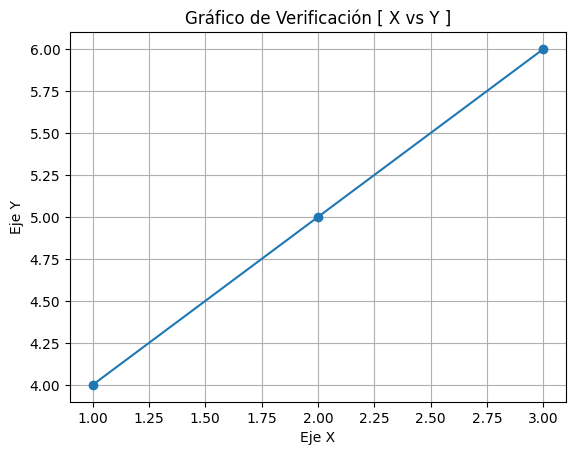

In [26]:

# TODO: Verificación del entorno científico: importación y versiones
import sys

try:
  import numpy as np
  import pandas as pd
  import matplotlib
  import matplotlib.pyplot as plt
except ImportError as e:
  raise ImportError("Falta un paquete necesario. Asegúrate de tener numpy, pandas y matplotlib instalados.") from e

print("Verificando librerías...")
print("Versión de Python: ", sys.version.split()[0])
print("Versión de NumPy: ", np.__version__)
print("Versión de Pandas: ", pd.__version__)
print("Versión de Matplotlib: ", matplotlib.__version__)

# NumPy: Comprobación básica de funcionamiento
a = np.array([1, 2, 3], dtype=float)
b = np.array([4, 5, 6], dtype=float)
print("\nProbando NumPy...")
print("Array a:", a)
print("Array b:", b)
print("Suma a + b:", a + b)
print("Producto punto a · b:", a @ b)

# Pandas: Comprobación básica de funcionamiento
df = pd.DataFrame({"x": [1, 2, 3], "y":[4, 5, 6]})
print("\nProbando Pandas...")
print("DataFrame:\n", df)
print("Suma de columnas:\n", df.sum())
print("Descripción estadística:\n", df.describe())

# Matplotlib: Comprobación básica de funcionamiento
plt.figure()
plt.plot(df["x"], df["y"], marker='o')
plt.title("Gráfico de Verificación [ X vs Y ]")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.grid(True)
plt.show()


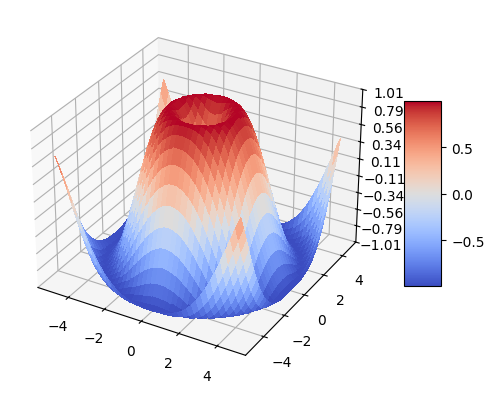

In [27]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Tema 2 — NumPy como base del ecosistema: arrays, vectorización y memoria

### Definición
NumPy proporciona la estructura `ndarray`, un arreglo homogéneo y multidimensional, contiguo en memoria y eficiente para operaciones vectorizadas. Sus funciones universales (ufuncs) permiten aplicar operaciones elemento a elemento sin bucles explícitos en Python.

### Importancia en programación y analítica de datos
- Los `ndarray` permiten manipular grandes volúmenes de datos con eficiencia cercana a C, lo que es crucial en analítica de datos.
- La vectorización reduce la complejidad de código y los errores, favoreciendo la legibilidad y el rendimiento.
- Librerías como Pandas reutilizan `ndarray` para representar columnas y realizar operaciones sobre datos tabulares.

### Buenas prácticas profesionales y errores comunes
- Preferir operaciones vectorizadas sobre bucles `for` en Python cuando se trabaje con datos numéricos.
- Cuidar los tipos de datos (`dtype`) y las conversiones implícitas.
- Evitar copias innecesarias de arrays; usar *views* y *slicing* cuando sea posible.


In [52]:

# TODO: Creación de arrays y operaciones vectorizadas con NumPy
import numpy as np

# Creación de arrays
arr_list = np.array([10, 20, 30, 40, 50], dtype=np.int64)
arr_zeros = np.zeros((2,4), dtype=np.float64)
arr_ones = np.ones((3,3), dtype=np.int32)
arr_random = np.random.rand(4,4)

print("arr_list: ", arr_list, "| shape", arr_list.shape, "| dtype:", arr_list.dtype)
print("arr_zeros: \n", arr_zeros)
print("arr_ones: \n", arr_ones)
print("arr_random: \n", arr_random)

# Propiedades y Operaciones
vec = np.arange(1, 6)
print("\nvec: ", vec)
print("Cuadrado Vectorizado: ", vec**2)
print("Raíz Cuadrada Vectorizada: ", np.sqrt(vec))
print("Suma de Elementos: ", np.sum(vec))
print("Media ( Promedio ) de Elementos: ", np.mean(vec))

# Slicing, rechape, acceso por indice
base = np.arange(1, 13)
matriz = base.reshape((3, 4))

print("\nMatriz Original:\n", matriz)
print("Primera Fila: ", matriz[0, :])
print("Ultima columna: ", matriz[:, -1 ])
print("Submatriz (2x2) del centro:\n", matriz[1:3, 1:3])
print("Elemento por Indice [2,3]: ", matriz[2, 3])


arr_list:  [10 20 30 40 50] | shape (5,) | dtype: int64
arr_zeros: 
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
arr_ones: 
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
arr_random: 
 [[0.0332945  0.9756345  0.30747048 0.15540911]
 [0.69893446 0.24731237 0.97579918 0.29121638]
 [0.5444585  0.02985731 0.66012087 0.09114398]
 [0.07143017 0.29381708 0.3818576  0.79702408]]

vec:  [1 2 3 4 5]
Cuadrado Vectorizado:  [ 1  4  9 16 25]
Raíz Cuadrada Vectorizada:  [1.         1.41421356 1.73205081 2.         2.23606798]
Suma de Elementos:  15
Media ( Promedio ) de Elementos:  3.0

Matriz Original:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Primera Fila:  [1 2 3 4]
Ultima columna:  [ 4  8 12]
Submatriz (2x2) del centro:
 [[ 6  7]
 [10 11]]
Elemento por Indice [2,3]:  12


# Ejercicios integradores

A continuación se proponen ejercicios que integran los conceptos del bloque. Cada ejercicio incluye contexto, datos/entradas, requerimientos, criterios de aceptación y pistas. Tras las consignas, se proporciona una posible solución en celdas de código separadas.

---

## Ejercicio 1 — Verificación y reporte del entorno
**Contexto técnico:** Eres la persona responsable de configurar el entorno de analítica para tu equipo. Debes generar una verificación reproducible del entorno actual para compartirla en la documentación interna del proyecto.
**Datos/entradas:** Acceso al intérprete de Python con las librerías ya instaladas.
**Requerimientos:**
1. Imprimir versiones de Python, NumPy, Pandas y Matplotlib.
2. Ejecutar una suma vectorizada `a + b` y un producto punto con `ndarray` pequeños para evidenciar funcionamiento.
3. Construir un `DataFrame` mínimo y mostrar sus primeras filas.
**Criterios de aceptación:**
- Las versiones se imprimen claramente.
- La operación vectorizada y el producto punto devuelven resultados correctos.
- El DataFrame se visualiza con al menos 2 columnas y 3 filas.
**Pistas:**
- Usa `np.array`, `@` para producto punto y `pd.DataFrame`.
- Reutiliza el patrón de importación y verificación mostrado en el bloque.


In [ ]:

# TODO: Solución Ejercicio 1

---

## Ejercicio 2 — Integración NumPy + Pandas + Matplotlib
**Contexto técnico:** Debes crear un ejemplo mínimo que muestre el flujo desde datos numéricos en memoria hasta una visualización rápida para validar una hipótesis simple.
**Datos/entradas:** Genera 50 valores equiespaciados en el intervalo [0, 2π], calcula seno y coseno.
**Requerimientos:**
1. Construir un `ndarray` con 50 puntos entre 0 y 2π.
2. Calcular `sin(x)` y `cos(x)` vectorizados.
3. Crear un `DataFrame` con columnas `x`, `sin`, `cos`.
4. Graficar `sin` y `cos` en figuras separadas.
**Criterios de aceptación:**
- El DataFrame contiene 50 filas y tres columnas (`x`, `sin`, `cos`).
- Las figuras se muestran sin errores (una por celda).
**Pistas:**
- Usa `np.linspace`, `np.sin`, `np.cos` y `plt.plot`.


In [32]:

# TODO: Solución Ejercicio 2
# Parte 1: Datos y DataFrame
import numpy as np
import pandas as pd

x = np.linspace(0, 2 * np.pi, 50)
sinx = np.sin(x)
cosx = np.cos(x)

df_trig = pd.DataFrame({"x": x, "sin(x)": sinx, "cos(x)": cosx})

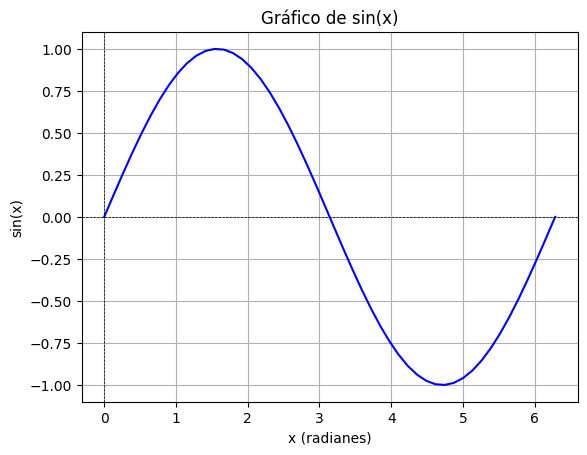

In [33]:
# Parte 2: Visualización de Seno
plt.figure()
plt.plot(df_trig["x"], df_trig["sin(x)"], label="sin(x)", color="blue")
plt.title("Gráfico de sin(x)")
plt.xlabel("x (radianes)")
plt.ylabel("sin(x)")
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(True)
plt.show()

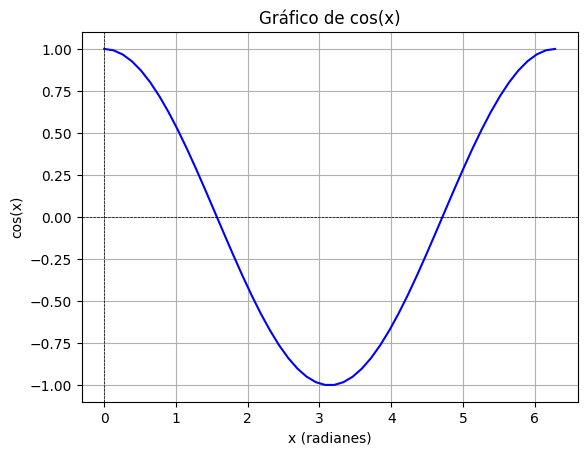

In [34]:
# Parte 3: Visualización de Coseno
plt.figure()
plt.plot(df_trig["x"], df_trig["cos(x)"], label="cos(x)", color="blue")
plt.title("Gráfico de cos(x)")
plt.xlabel("x (radianes)")
plt.ylabel("cos(x)")
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid(True)
plt.show()

---

## Ejercicio 3 — Reproducibilidad y control de versiones de dependencias
**Contexto técnico:** Tu equipo requiere un archivo mínimo de dependencias para garantizar que nuevas incorporaciones repliquen el entorno sin fricción.
**Datos/entradas:** Las librerías en el entorno actual.
**Requerimientos:**
1. Crear una cadena de texto con el contenido de un `requirements.txt` mínimo que fije versiones de `numpy`, `pandas` y `matplotlib`.
2. Imprimir la cadena y, opcionalmente, guardarla a disco como `requirements.txt`.
**Criterios de aceptación:**
- El archivo de texto contiene exactamente tres líneas con el nombre del paquete y su versión fijada.
- El archivo se guarda correctamente cuando se habilita la escritura.
**Pistas:**
- Usa `np.__version__`, `pd.__version__` y `matplotlib.__version__` para construir las líneas.


In [ ]:

# TODO: Solución Ejercicio 3

---

## Ejercicio 4 — Medición básica de rendimiento
**Contexto técnico:** Debes justificar ante tu equipo la ventaja de operar con arrays de NumPy frente a listas nativas.
**Datos/entradas:** Un tamaño de `n = 500_000` elementos para pruebas.
**Requerimientos:**
1. Construir una lista nativa y un `ndarray` con valores `0..n-1`.
2. Medir el tiempo para elevar al cuadrado con comprensión de listas versus operación vectorizada.
3. Reportar los tiempos en segundos y verificar que los resultados son equivalentes.
**Criterios de aceptación:**
- Se imprimen dos tiempos claramente etiquetados.
- Se verifica la equivalencia numérica de los resultados con una tolerancia razonable.
**Pistas:**
- Usa `time.perf_counter()` y `np.allclose`.


In [ ]:

# TODO: Solución Ejercicio 4